In [1]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
house_prices_df = pd.read_csv('train.csv')

In [3]:
house_prices_df = pd.read_csv('test.csv')

In [9]:
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [12]:
missing_data_percentage = (house_prices_df.isnull().sum() / len(house_prices_df)) * 100
print(missing_data_percentage[missing_data_percentage > 0].sort_values(ascending=False))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


In [13]:
house_prices_df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType'], axis=1, inplace=True)

In [14]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
median_LotFrontage = house_prices_df['LotFrontage'].median()

In [16]:
house_prices_df['LotFrontage'].fillna(median_LotFrontage, inplace=True)

C:\Users\Paulo Silas\AppData\Local\Temp\ipykernel_14364\3193579911.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_prices_df['LotFrontage'].fillna(median_LotFrontage, inplace=True)


In [17]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [19]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    house_prices_df[col] = house_prices_df[col].fillna('None')

In [20]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [21]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_prices_df[col] = house_prices_df[col].fillna('None')

In [22]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

MasVnrArea       8
Electrical       1
FireplaceQu    690
GarageYrBlt     81
dtype: int64


In [23]:
house_prices_df['MasVnrArea'] = house_prices_df['MasVnrArea'].fillna(0)
house_prices_df['GarageYrBlt'] = house_prices_df['GarageYrBlt'].fillna(0)

In [24]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

Electrical       1
FireplaceQu    690
dtype: int64


In [25]:
moda_electrical = house_prices_df['Electrical'].mode()[0]
house_prices_df['Electrical'].fillna(moda_electrical, inplace=True)

C:\Users\Paulo Silas\AppData\Local\Temp\ipykernel_14364\2749717257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_prices_df['Electrical'].fillna(moda_electrical, inplace=True)


In [26]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

FireplaceQu    690
dtype: int64


In [27]:
house_prices_df['FireplaceQu'] = house_prices_df['FireplaceQu'].fillna('None')

In [28]:
missing_data_count = house_prices_df.isnull().sum()
print(missing_data_count[missing_data_count > 0])

Series([], dtype: int64)


In [29]:
house_prices_df['TotalSF'] = house_prices_df['GrLivArea'] + house_prices_df['TotalBsmtSF']

In [30]:
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,12,2008,WD,Normal,250000,3343


In [31]:
house_prices_df = pd.get_dummies(house_prices_df)

In [32]:
house_prices_df.shape

(1460, 284)

In [33]:
X = house_prices_df.drop('SalePrice', axis=1)
y = house_prices_df['SalePrice']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(1168, 283)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)
print(y_pred[:5])

[155737.91799533 356858.99384216  87076.20409787 179948.92309362
 318875.34224833]


In [39]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [40]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'O RMSE do nosso modelo é: {rmse}')

O RMSE do nosso modelo é: 29696.328540222894


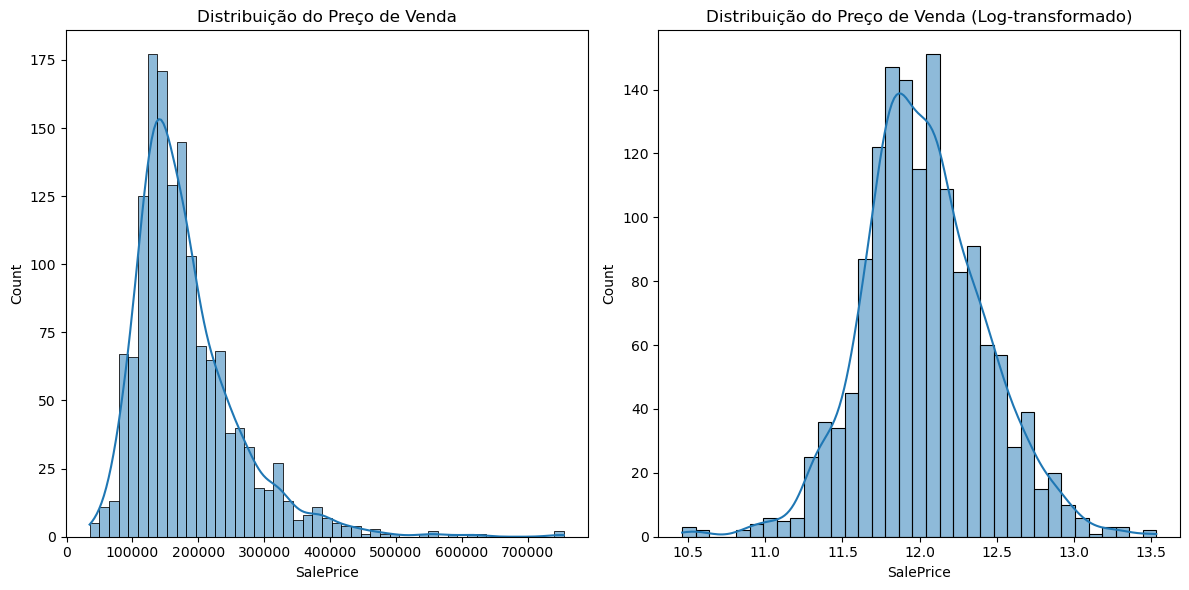

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(house_prices_df['SalePrice'], kde=True)
plt.title('Distribuição do Preço de Venda')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(house_prices_df['SalePrice']), kde=True)
plt.title('Distribuição do Preço de Venda (Log-transformado)')

plt.tight_layout()
plt.show()

In [42]:
y_log = np.log1p(house_prices_df['SalePrice'])
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)
model.fit(X_train, y_train_log)

LinearRegression()

In [43]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
rmse_new = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'O novo RMSE do nosso modelo é: {rmse_new}')

O novo RMSE do nosso modelo é: 22948.824159198084


In [55]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ------ --------------------------------- 9.7/56.8 MB 57.4 MB/s eta 0:00:01
   -------------- ------------------------- 20.4/56.8 MB 55.2 MB/s eta 0:00:01
   ---------------------- ----------------- 32.2/56.8 MB 56.0 MB/s eta 0:00:01
   ------------------------------ --------- 43.0/56.8 MB 55.3 MB/s eta 0:00:01
   -------------------------------------- - 54.8/56.8 MB 55.7 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 55.8 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 46.4 MB/s eta 0:00:00


In [56]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred_log_xgb = xgb_model.predict(X_test)

In [58]:
y_pred_xgb = np.expm1(y_pred_log_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f'O RMSE do modelo XGBoost é: {rmse_xgb}')

O RMSE do modelo XGBoost é: 28593.021806028126


In [59]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [60]:
xgb_model = XGBRegressor(random_state=42)

In [61]:
parametros = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}


In [62]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=parametros,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [63]:
grid_search.fit(X_train, y_train_log)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [64]:
y_pred_log_tuned = grid_search.predict(X_test)

In [65]:
y_pred_tuned = np.expm1(y_pred_log_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print(f'O RMSE do modelo XGBoost otimizado é: {rmse_tuned}')

O RMSE do modelo XGBoost otimizado é: 28960.18342483348


In [70]:
test_df = pd.read_csv('test.csv')

In [71]:
test_df['TotalSF'] = test_df['GrLivArea'] + test_df['TotalBsmtSF']
test_df = test_df.fillna(0) 

In [72]:
test_df = pd.get_dummies(test_df)

In [73]:
X_train_cols = X_train.columns
test_df = test_df.reindex(columns=X_train_cols, fill_value=0)

In [74]:
final_predictions_log = model.predict(test_df)

In [75]:
final_predictions = np.expm1(final_predictions_log)

In [77]:
test_ids = test_df['Id']

In [78]:
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': final_predictions
})

In [79]:
submission_df.to_csv('submission.csv', index=False)